In [16]:
import functools
import folium
from skimage.filters import sobel
from utils import *

In [2]:
selected_area = load_shapefile('shapefiles/Bihar_study_area/Selected_districts_Bihar.shp')
selected_area.head()

DISTRICT_I         NAME STATE_UT          C_CODE11  TOT_HH  TOT_POP  \
0         234  Muzaffarpur    Bihar  1021600000000000  945703  4801062   
1         258     Vaishali    Bihar  1022000000000000  626087  3495021   
2         281        Patna    Bihar  1023000000000000  975578  5838465   

     M_POP    F_POP  TOT_L6    M_L6  ...  U_TOT_LIT  U_M_LIT  U_F_LIT  \
0  2527497  2273565  845335  441339  ...     328809   183111   145698   
1  1844535  1650486  601893  316129  ...     146753    84073    62680   
2  3078512  2759953  943552  494228  ...    1769307   992574   776733   

   U_TOT_ILLT  U_M_ILLT  U_F_ILLT  U_TOT_W   U_M_W   U_F_W  \
0      144628     67574     77054   143159  116799   26360   
1       86326     39241     47085    63530   55629    7901   
2      745283    339913    405370   742578  614101  128477   

                                            geometry  
0  POLYGON ((85.58430 26.38453, 85.58449 26.38218...  
1  POLYGON ((85.25243 26.01140, 85.25300 26.01133...  
2  POLYGON ((85.02075 25.73202, 85.02852 25.73189...  

[3 rows x 71 columns]

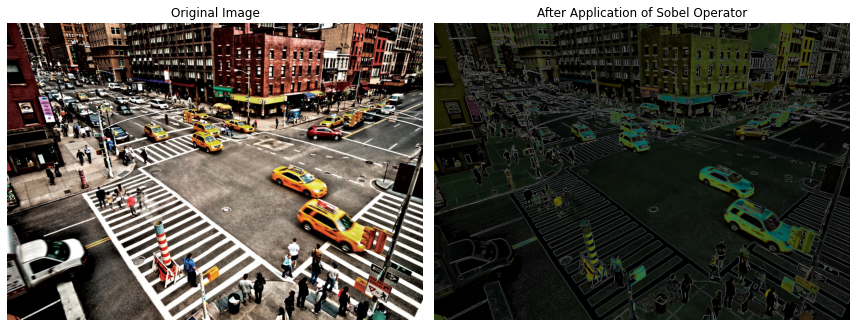

In [30]:
import matplotlib
image = matplotlib.image.imread('visualisations/busy_intersection.jpg')
image_sobel = sobel(image)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(image_sobel, cmap=plt.cm.gray)
axs[1].set_title('After Application of Sobel Operator')

for ax in axs:
    ax.axis('off')

plt.tight_layout()

In [4]:
area_of_interest = load_shapefile('shapefiles//india_kilns_classified_v3//india_kiln_types_v3.shp')

In [3]:
area_of_interest[area_of_interest.probabilit > 0.999]

probabilit  zone_id       id       kiln_type  kiln_type_  \
42       0.999775     1017  1405753     bull_trench    1.000000   
47       0.999816     1017  1403795     bull_trench    1.000000   
136      0.999525     1857  3451354     bull_trench    1.000000   
157      0.999719     1983  3396693     bull_trench    0.999999   
241      0.999523     1658  2892567          zigzag    1.000000   
...           ...      ...      ...             ...         ...   
75383    0.999481     1733  2940025     bull_trench    0.993102   
75401    0.999197     1733  2939404     bull_trench    0.999988   
75421    0.999606     1956  3511429     bull_trench    0.999992   
75427    0.999551     1525  2701873     bull_trench    0.999978   
75486    0.999421     1291  2156421  false_positive    0.915851   

                                                geometry  
42     POLYGON ((76.15082 29.20775, 76.15082 29.20848...  
47     POLYGON ((76.57783 29.30108, 76.57783 29.30188...  
136    POLYGON ((83.97735 25.95436, 83.97735 25.95514...  
157    POLYGON ((86.44587 23.88019, 86.44587 23.88062...  
241    POLYGON ((81.17074 26.15937, 81.17074 26.16013...  
...                                                  ...  
75383  POLYGON ((82.06643 25.48578, 82.06643 25.48646...  
75401  POLYGON ((82.21545 25.50236, 82.21545 25.50311...  
75421  POLYGON ((85.66556 25.89935, 85.66556 25.89995...  
75427  POLYGON ((80.14454 27.37761, 80.14454 27.37841...  
75486  POLYGON ((78.37829 26.89476, 78.37829 26.89549...  

[4516 rows x 6 columns]

In [12]:
m = folium.Map(location=[25.5, 80], zoom_start=6, control_scale=True)

for row in area_of_interest[area_of_interest.probabilit > 0.999].itertuples():
    coords = row.geometry.representative_point()
    lat, lon = coords.x, coords.y
    folium.Marker(
    location=[lon, lat],
    popup=(row.kiln_type, row.Index),
    icon=folium.Icon(color='red', icon='info-sign'),
    ).add_to(m)
    # if row.Index == 400:
    #     break
m

In [14]:
m.save('index.html')

In [4]:
building_link(75427, 16.23, shapefile=area_of_interest)

'https://www.planet.com/basemaps/#/mosaic/global_quarterly_2020q1_mosaic/center/80.14501725260655,27.3780104043806/zoom/16.23/geometry/POLYGON((80.1445425001427227.377608787342425,80.1445425001427227.378412021418775,80.1454920050703827.378412021418775,80.1454920050703827.377608787342425,80.1445425001427227.377608787342425))'

In [3]:
building_link(45320, 16.23, shapefile=area_of_interest)

'https://www.planet.com/basemaps/#/mosaic/global_quarterly_2020q1_mosaic/center/74.8430606391249,33.94429201067505/zoom/16.23/geometry/POLYGON((74.8425696559014133.94390942497309,74.8425696559014133.944674596377006,74.8435516223483933.944674596377006,74.8435516223483933.94390942497309,74.8425696559014133.94390942497309))'

In [ ]:
f, ax = plt.subplots(1, figsize=(12,12))
ax = selected_area[selected_area.NAME == 'Patna'].plot(ax=ax)
ax.set_axis_off()
plt.show()

In [ ]:
high_res_2 = load_tiff_paths('tiffs//high_res_bangladesh//2')
high_res_2

In [ ]:
# a Has loads of brick kilns
# These tiff are in folder 2 and the respective low res images are in low_res_bang
high_res_2[0]
a = 'IMG_PHR1B_PMS_202203060446183_ORT_6401724101_R4C2.TIF'
b = 'IMG_PHR1B_PMS_202203060446183_ORT_6401724101_R6C3.TIF'


In [ ]:
first_bangladesh_area = load_tiff(high_res_2[0], show=True)

In [ ]:
file_name = 'tiffs//low_res_bangladesh//L15-1537E-1163N.tif'
tiff = load_tiff(file_name, show=True)

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(first_bangladesh_area[8750:11750, 13000:16000])  

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(tiff[2666:2936, 3630:3856])  

In [ ]:
fig = plt.figure()
fig.imshow(tiff[2666:2936, 3630:3856])

In [ ]:
tiff_path = high_res_2[0]
tiff_array = rioxarray.open_rasterio(tiff_path, variable=["green"], mask_and_scale=True)
print(tiff_array.rio.transform_bounds(
        "+init=epsg:4326",
        densify_pts=1,
))

tiff_path = 'tiffs//low_res_bangladesh//L15-1537E-1163N.tif'
tiff_array = rioxarray.open_rasterio(tiff_path, variable=["green"], mask_and_scale=True)
print(tiff_array.rio.transform_bounds(
        "+init=epsg:4326",
        densify_pts=1,
))

In [ ]:
high_res1 = rasterio.open(high_res_2[0])

low_res_tiff_path = 'tiffs//low_res_bangladesh//L15-1537E-1163N.tif'
low_res1 = rasterio.open(low_res_tiff_path)


high_transformer = Transformer.from_crs('epsg:32646', 'epsg:4326')
x, y = high_res1.xy(0,0)
print(high_transformer.transform(x, y))

low_transformer = Transformer.from_crs('epsg:3857', 'epsg:4326')
x, y = low_res1.xy(0,2000)
print(low_transformer.transform(x, y))

https://rasterio.readthedocs.io/en/latest/quickstart.html

In [ ]:
def get_shared_region(low_res_tiff_path, high_res_tiff_path):
    high_res = rasterio.open(high_res_tiff_path)
    low_res = rasterio.open(low_res_tiff_path)
    print(high_res.crs)
    print(low_res.crs)

    top_left = high_res.transform * (0, 0)
    x, y = high_res.bounds.left + top_left[0], high_res.bounds.top - top_left[1]
    return high_res.index(x, y)

get_shared_region(high_res_2[0], low_res_tiff_path)

In [2]:
patna_area_tiffs = load_tiff_paths('tiffs/patna_area_tiffs')
all_india_2022 = load_tiff_paths('tiffs//all_india_2022')
all_india_2020 = load_tiff_paths('tiffs//all_india_2020')

In [ ]:
file_name = all_india_2020[9]
tiff = load_tiff(file_name, plot=True)

In [ ]:
file_name  = all_india_2020[9]
coords, tiff_array, covered_regions = areas_covered(file_name, area_of_interest)
covered_regions

In [5]:
correctly_identified = 0
identified = 0
c = []
for tiff in all_india_2020:
    _, _, covered_regions = areas_covered(tiff, area_of_interest)
    correctly_identified += covered_regions[covered_regions.kiln_type != 'false_positive'].shape[0]
    identified += covered_regions.shape[0]
    c.append(covered_regions)

print('The tiffs identified', identified, 'kilns', 'and', correctly_identified, 'were actually kilns.')

The tiffs identified 2087 kilns and 1954 were actually kilns.


In [8]:
all_india_tiffs = pandas.concat(c)
query = all_india_tiffs[all_india_tiffs.probabilit < 0.95].sort_values('probabilit')
query

probabilit  zone_id       id    kiln_type  kiln_type_  \
375      0.885315      710   540867  bull_trench    0.999998   
376      0.949559      710   544020  bull_trench    0.984725   
378      0.926382      710   543309  bull_trench    0.998644   
379      0.961127      710   544943  bull_trench    0.999801   
382      0.941147      710   544009  bull_trench    0.999988   
...           ...      ...      ...          ...         ...   
74555    0.986875     2096  3686764       zigzag    0.991337   
74557    0.995037     2096  3686762       zigzag    0.951466   
75037    0.995207     2096  3687439  bull_trench    0.975465   
75042    0.370355     2096  3686464       zigzag    0.687000   
75043    0.968870     2096  3687652  bull_trench    1.000000   

                                                geometry  
375    POLYGON ((74.25293 29.54899, 74.25293 29.54977...  
376    POLYGON ((74.25145 29.54392, 74.25145 29.54454...  
378    POLYGON ((74.27705 29.55427, 74.27705 29.55494...  
379    POLYGON ((74.25961 29.55703, 74.25961 29.55762...  
382    POLYGON ((74.25613 29.55587, 74.25613 29.55664...  
...                                                  ...  
74555  POLYGON ((88.86558 22.66905, 88.86558 22.66980...  
74557  POLYGON ((88.86501 22.67035, 88.86501 22.67112...  
75037  POLYGON ((88.91796 22.65939, 88.91796 22.66015...  
75042  POLYGON ((88.77038 22.64734, 88.77038 22.64800...  
75043  POLYGON ((88.86590 22.69149, 88.86590 22.69227...  

[2087 rows x 6 columns]

In [63]:
tiff_bull_trenches = [d.query('kiln_type=="bull_trench"').shape[0] for d in c]
tiff_zigzags = [d.query('kiln_type=="zigzag"').shape[0] for d in c]

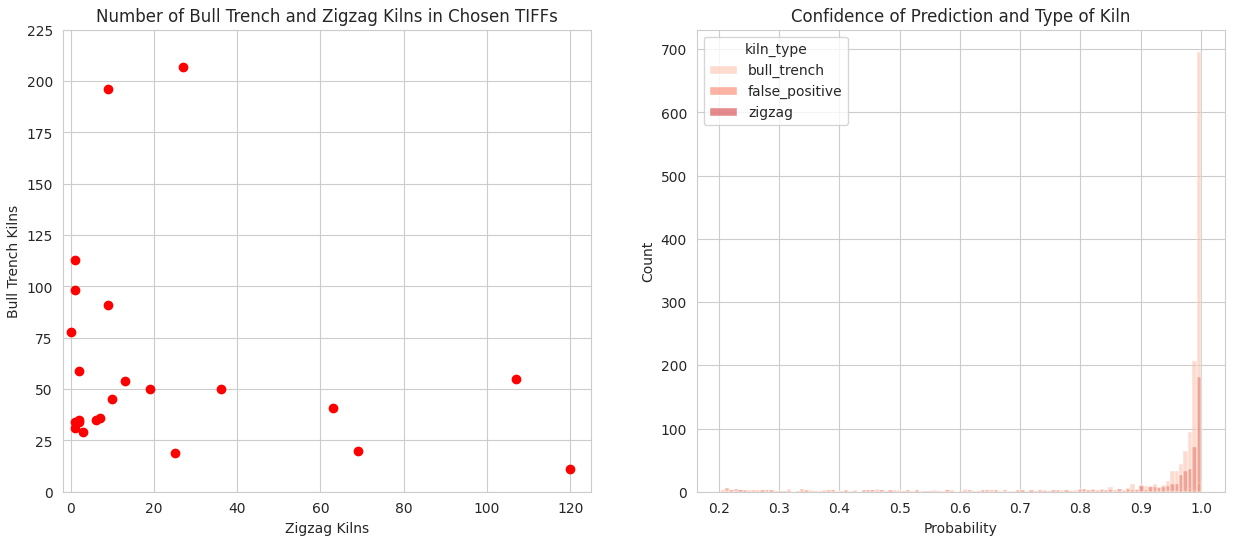

In [73]:
import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
f, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].scatter(x=tiff_zigzags, y=tiff_bull_trenches, c='Red')
axs[0].set_xlabel('Zigzag Kilns')
axs[0].set_ylabel('Bull Trench Kilns')
axs[0].set_ylim(0,225)
axs[0].set_xlim(-2,125)
axs[0].set_title('Number of Bull Trench and Zigzag Kilns in Chosen TIFFs')
plt.title('Number of Bull Trench and Zigzag Kilns in Choosen TIFFs')
sns.histplot(x='probabilit', hue='kiln_type', data=all_india_tiffs, palette='Reds', ax=axs[1])
plt.xlabel('Probability')
plt.title('Confidence of Prediction and Type of Kiln')
plt.savefig('visualisations/types_of_kilns_in_project.pdf')
sns.reset_defaults()

In [ ]:
plt.hist(all_india_tiffs.probabilit)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
file_name = all_india_2020[9]
coords, tiff_array, covered_regions = areas_covered(file_name, area_of_interest)
low_prob_kilns = covered_regions.reset_index()[covered_regions.reset_index().probabilit < 0.8]
low_prob_kilns

In [ ]:
file_name = high_res_2[0]
coords, tiff_array, covered_regions = areas_covered(file_name, area_of_interest)
covered_regions.head()

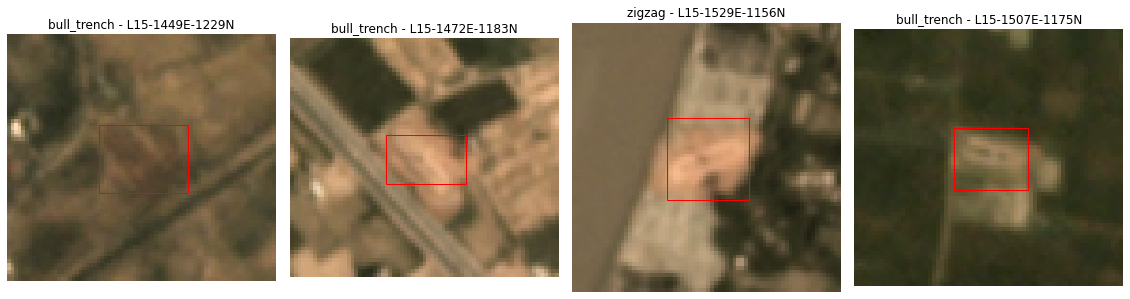

In [25]:
def get_selection2(tiff_paths, shapefile, kiln_nums):
    f, axs = plt.subplots(1, len(tiff_paths), figsize=(20, 7))
    for idx, (tiff_path, kiln_num) in enumerate(zip(tiff_paths, kiln_nums)):
        tiff = load_tiff(tiff_path)
        coords, tiff_array, covered_regions = areas_covered(tiff_path, shapefile)
        long_min, lat_min, long_max, lat_max = coords
        kiln_long_min, kiln_lat_min, kiln_long_max, kiln_lat_max = covered_regions.geometry.iloc[kiln_num].bounds

        x = covered_regions.geometry.iloc[kiln_num].representative_point().x
        y = covered_regions.geometry.iloc[kiln_num].representative_point().y

        left = floor(((kiln_long_min-long_min)/(long_max-long_min))*tiff_array.shape[-1])
        right = ceil(((kiln_long_max-long_min)/(long_max-long_min))*tiff_array.shape[-1])
        top = ceil(((lat_max-kiln_lat_max)/(lat_max-lat_min))*tiff_array.shape[-2])
        bottom =  floor(((lat_max-kiln_lat_min)/(lat_max-lat_min))*tiff_array.shape[-2])

        trans_x = floor(((x-long_min)/(long_max-long_min))*tiff_array.shape[-1])
        trans_y = floor(((lat_max-y)/(lat_max-lat_min))*tiff_array.shape[-2])
        scaled_x = left-25-trans_x
        scaled_y = top-25-trans_y

        axs[idx].imshow(tiff[top-25:bottom+25,left-25:right+25])  
        
        # ax.scatter(-scaled_y, -scaled_x, color='r')
        axs[idx].set_title(f'{covered_regions.kiln_type.iloc[kiln_num]} - {tiff_path.split("//")[-1][:-4]}')
    
        rect = patches.Rectangle((25,25), right-left, bottom-top, linewidth=1, edgecolor='r', facecolor='none')
        axs[idx].add_patch(rect)
        axs[idx].axis('off')
        axs[idx].set_aspect('equal')
    
    plt.subplots_adjust( wspace=0.05, hspace=0.1)
    # f.tight_layout()
    plt.savefig('visualisations/kiln_distribution_across_india.pdf')

get_selection2([all_india_2020[i] for i in  [2,5,22,15]], area_of_interest, [1,5,5,3])

In [120]:
all_india_2020[13].split('//')[-1][:-4]


'L15-1504E-1184N'

In [75]:
_, locations, _ = create_kiln_mask('tiffs//all_india_2020//L15-1529E-1156N.tif', area_of_interest)
locations[84]

array([3529, 3536, 2512, 2530])

[2338 2361 3620 3625]
[3609 3627  620  623]
[2634 2640 3981 3999]
[2458 2470 2221 2226]
[3791 3799 2142 2159]
[ 839  845 2860 2877]
[1260 1265  335  347]
[3529 3536 2512 2530]


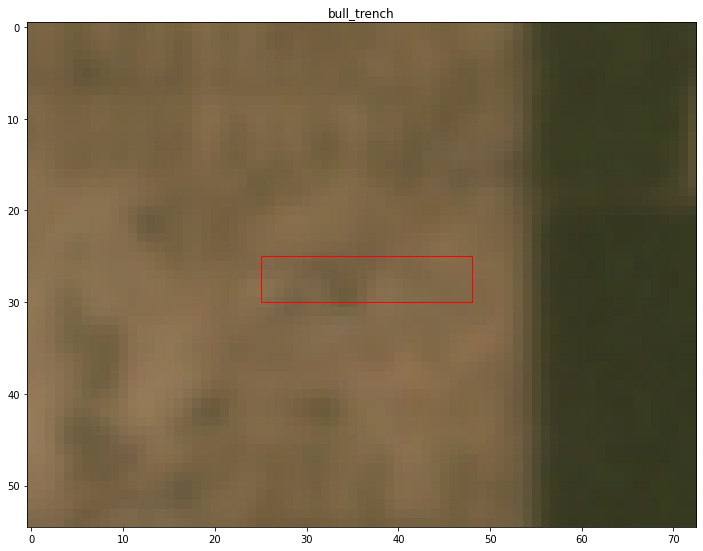

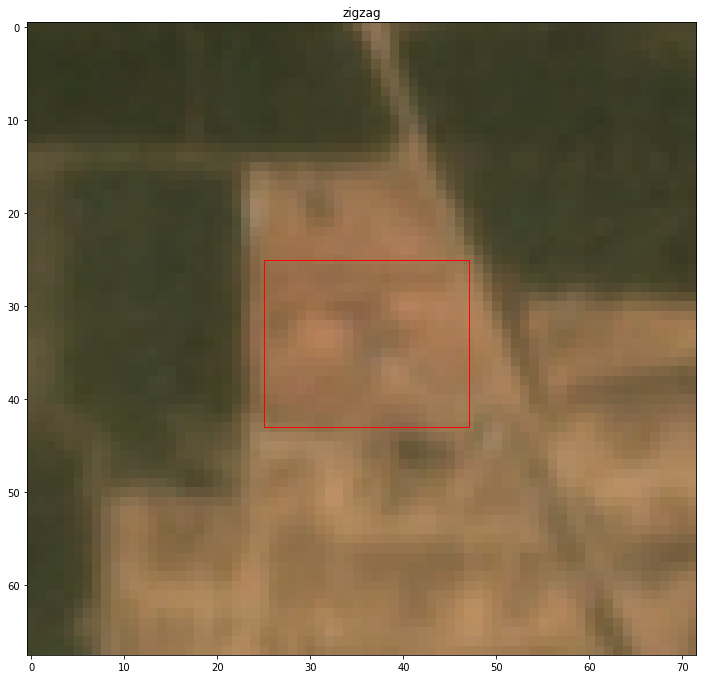

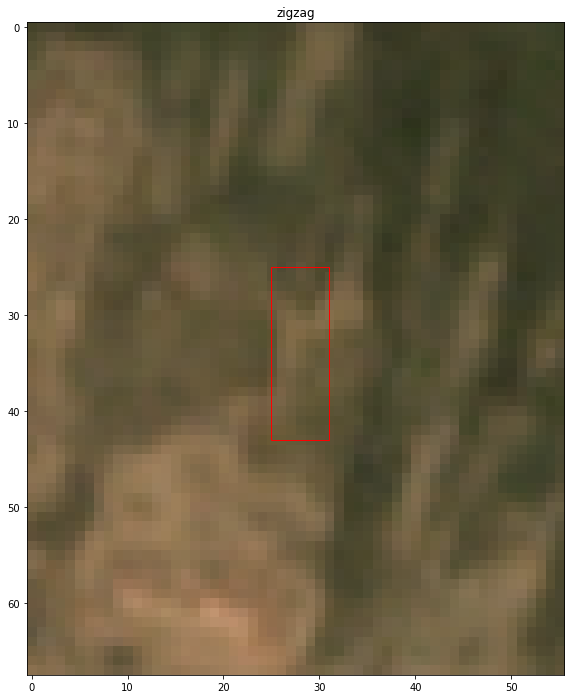

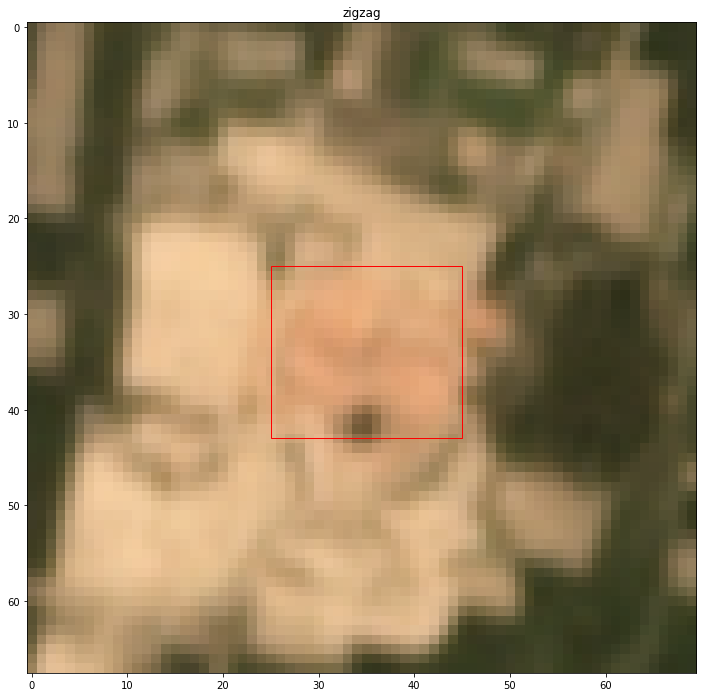

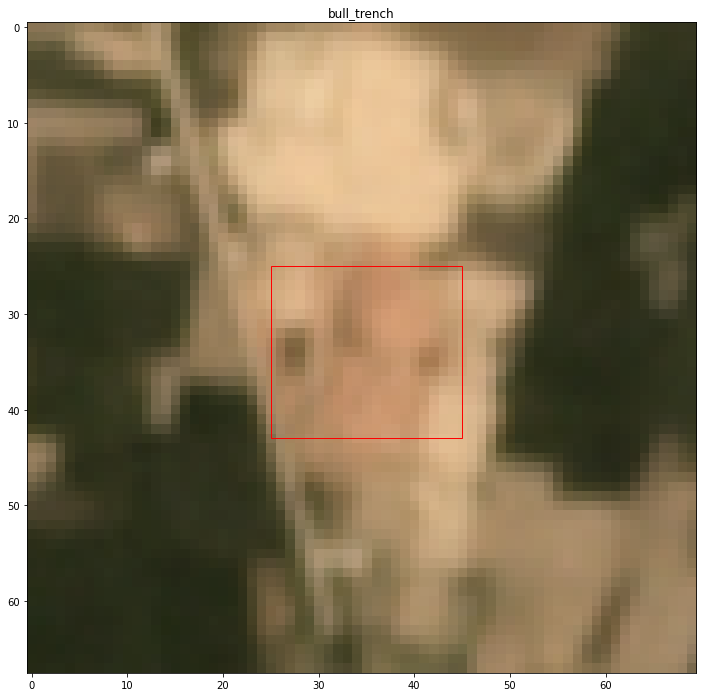

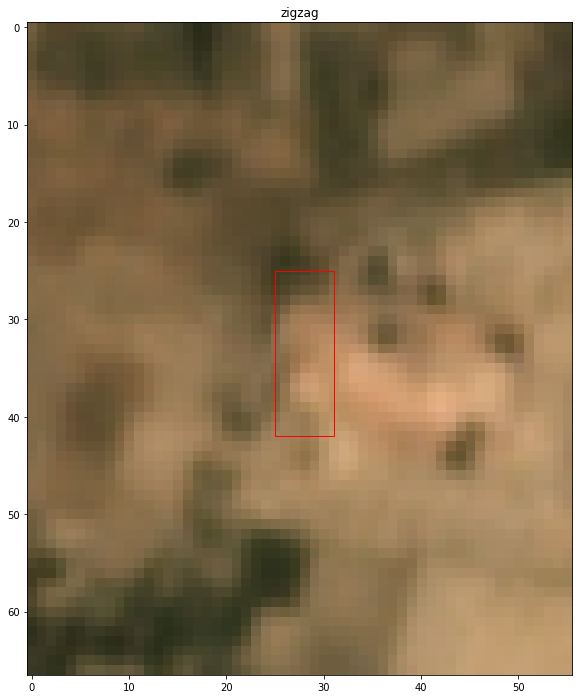

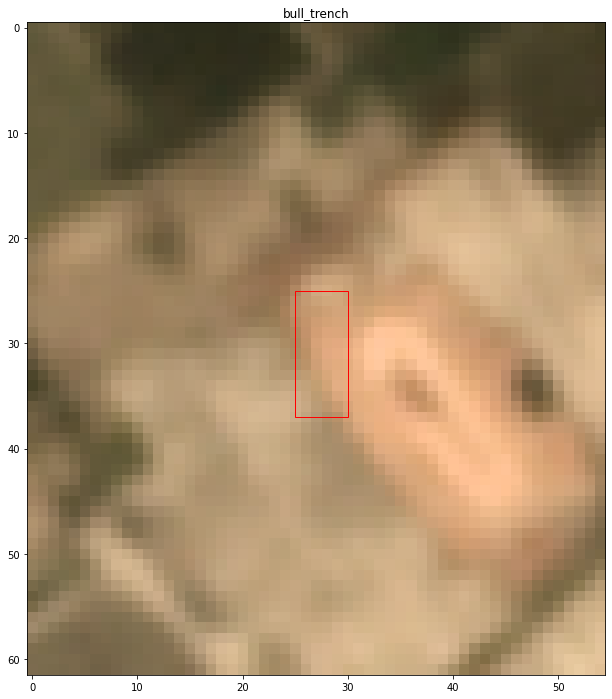

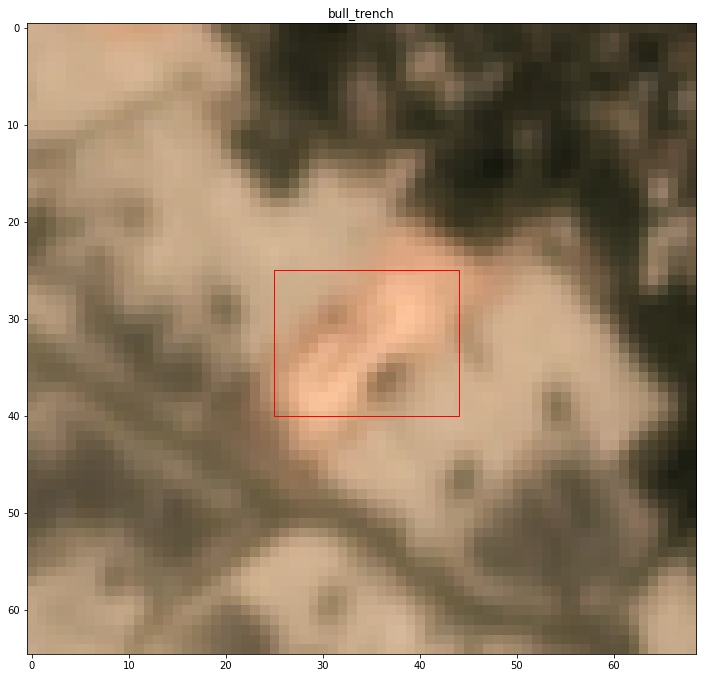

In [77]:
for file_name in all_india_2020:
    _, locations, _ = create_kiln_mask(file_name, area_of_interest)
    for idx, coords in enumerate(locations):
        if coords[1]-coords[0] < 9 or coords[3]-coords[2] < 9:
            print(locations[idx])
            get_selection(file_name, area_of_interest, idx)

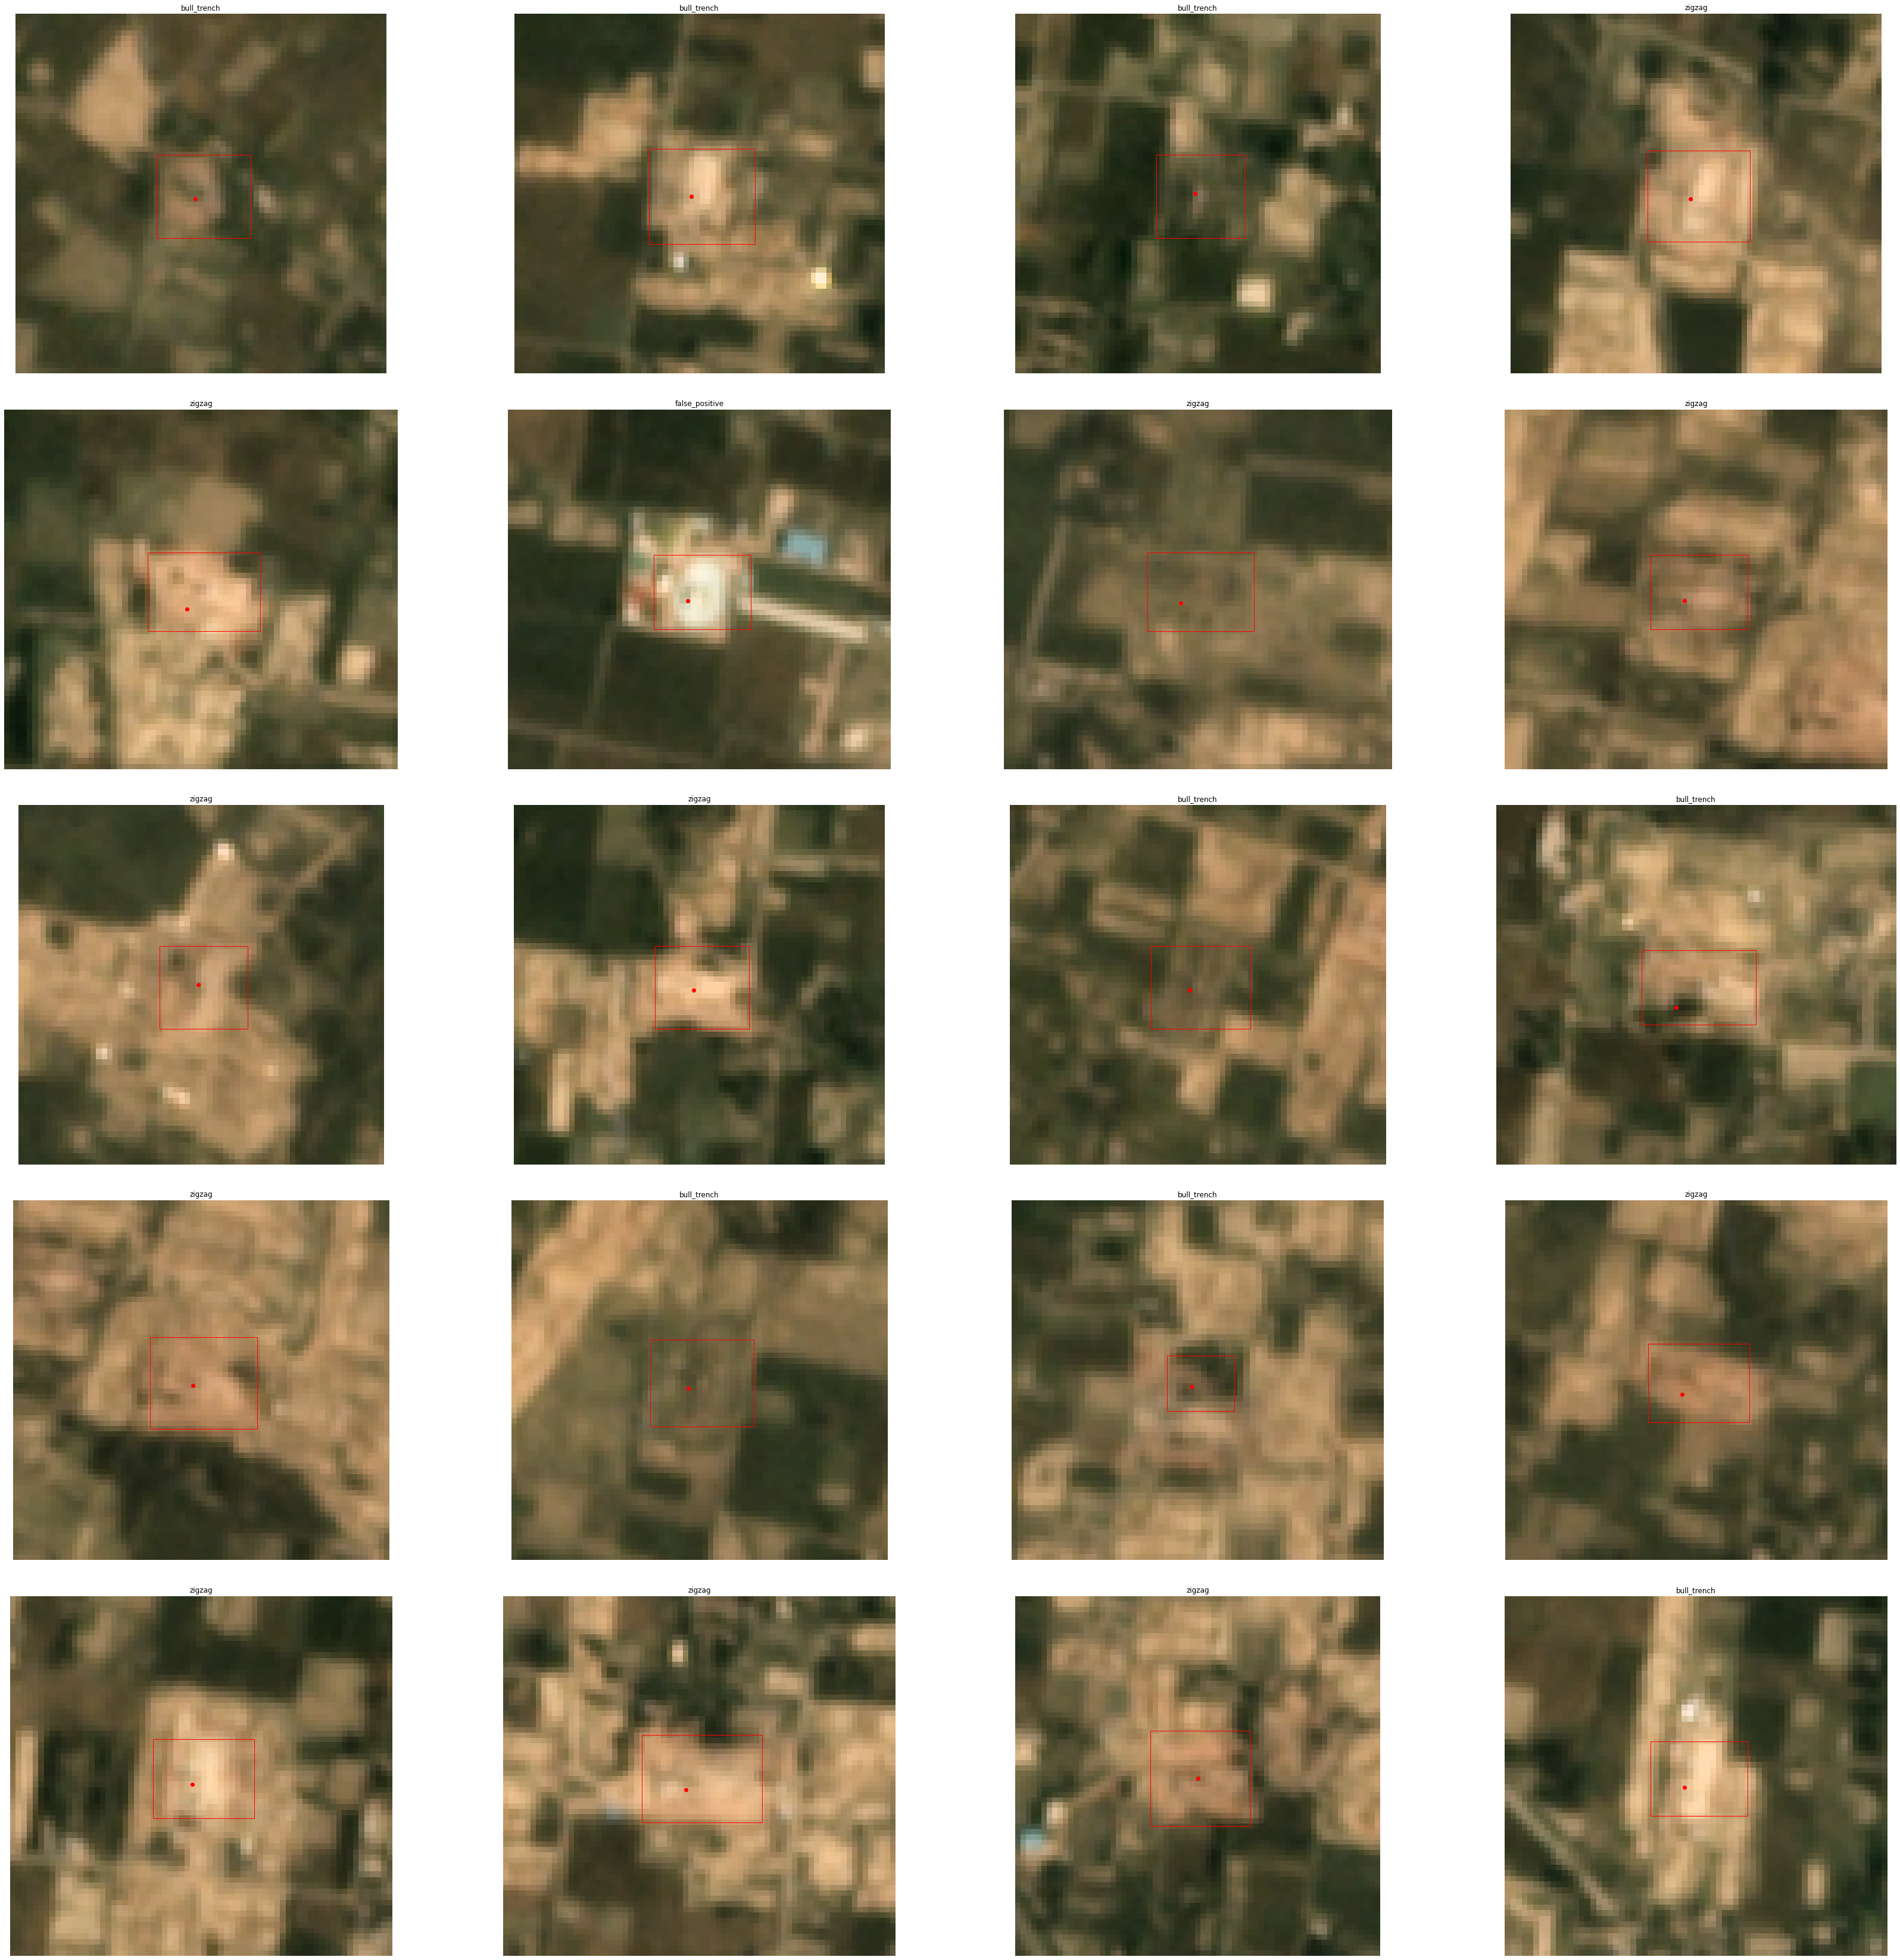

In [5]:
file_name =  all_india_2020[9]
view_kilns(file_name, area_of_interest)

In [ ]:
file_name = all_india_2020[9]
create_kiln_mask(file_name, area_of_interest, True)

In [ ]:
file_name = all_india_2020[9]
mask, locations = create_kiln_mask(file_name, area_of_interest)
tiff = load_tiff(file_name)
left, right, top, bottom = locations[0]
fill_width = 300-(right-left)
fill_height = 300-(bottom-top)
lb = random.randint(0, fill_width)
rb = fill_width - lb
tb = random.randint(0, fill_height)
bb = fill_height - tb

f, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(tiff[top-tb:bottom+bb,left-lb:right+rb])  
ax[1].imshow(mask[top-tb:bottom+bb,left-lb:right+rb])  

In [ ]:
import tensorflow as tf
from tensorflow.image import adjust_hue, adjust_brightness, adjust_contrast, adjust_gamma, adjust_saturation

In [ ]:
image = tiff[top-tb:bottom+bb,left-lb:right+rb]
view_augmentation(image, adjust_brightness, [-0.3, 0.6])
view_augmentation(image, adjust_contrast, [0.4, 3])
view_augmentation(image, adjust_saturation, [0, 2])

In [ ]:
augmentations = [adjust_brightness, adjust_contrast, adjust_saturation, identity_augment]
augmentations_intervals = [[-0.3, 0.6], [0.4, 3], [0, 2], [0, 10]]
augmentations = list(zip(augmentations, augmentations_intervals))

In [ ]:
model_name =  'networks/unet_large_all_india_separable_3x3_1_regularised'
model = tf.keras.models.load_model(model_name, compile=False)

In [ ]:
file_name = all_india[0]
tiff = load_tiff(file_name, show=False)
mask, locations = create_kiln_mask(file_name, area_of_interest)
for idx, kiln in enumerate(locations):
    if idx == 10:
        break
    try:
        left, right, top, bottom = kiln
        fill_width = 300-(right-left)
        fill_height = 300-(bottom-top)
        lb = random.randint(0, fill_width)
        rb = fill_width - lb
        tb = random.randint(0, fill_height)
        bb = fill_height - tb
        test_img = np.expand_dims(tiff[top-tb:bottom+bb,left-lb:right+rb], axis=0)
        prediction = np.squeeze(model.predict(test_img))

        f, ax = plt.subplots(1, 3, figsize=(30, 30))
        ax[0].imshow(tiff[top-tb:bottom+bb,left-lb:right+rb])  
        ax[1].imshow(mask[top-tb:bottom+bb,left-lb:right+rb]) 
        ax[2].imshow(prediction)
    except:
        pass

In [ ]:
file_name = patna_area_tiffs[3]
tiff = load_tiff(file_name, show=False)
mask, locations = create_kiln_mask(file_name, area_of_interest)
left, right, top, bottom = locations[1]
fill_width = 300-(right-left)
fill_height = 300-(bottom-top)
lb = random.randint(0, fill_width)
rb = fill_width - lb
tb = random.randint(0, fill_height)
bb = fill_height - tb

print(locations[1])
f, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(tiff[top-tb:bottom+bb,left-lb:right+rb])  
ax[1].imshow(mask[top-tb:bottom+bb,left-lb:right+rb])  

In [ ]:
test_img = np.expand_dims(tiff[top-tb:bottom+bb,left-lb:right+rb], axis=0)
prediction = np.squeeze(model.predict(test_img))

f, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(tiff[top-tb:bottom+bb,left-lb:right+rb])  
ax[1].imshow(mask[top-tb:bottom+bb,left-lb:right+rb]) 
ax[2].imshow(prediction)